In [30]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from anndata import AnnData
import torch
sys.path.append('./')  # uncomment for local import
import tangram as tg

%load_ext autoreload
%autoreload 2
%matplotlib inline

tg.__version__

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'1.0.4'

In [31]:
counts = pd.read_csv(
         '/home/giacomo/Documents/Analysis/Adult_mouse_transcriptome_analyses/dataset/Ludovic_annotation_10-23/coronal10/well10_cerebellum_counts.csv',
         header=0,
         index_col=0)
counts = counts.T
coordinates = pd.read_csv(
              '/home/giacomo/Documents/Analysis/Adult_mouse_transcriptome_analyses/dataset/Ludovic_annotation_10-23/coronal10/well10_cerebellum_cells_metadata.csv',
              header=0,
              index_col=0)

In [32]:
counts.columns

Index(['A2M', 'ABCC9', 'ABI3BP', 'ACBD7', 'ACTA2', 'ADA', 'ADAMTS15', 'ADARB2',
       'ADCY1', 'ADCYAP1',
       ...
       'WHRN', 'WIF1', 'WNT2', 'WNT4', 'YJEFN3', 'ZBTB20', 'ZFHX4', 'ZFP239',
       'ZIC1', 'ZMYM1'],
      dtype='object', name='GENE', length=1022)

In [33]:
ad_sp = AnnData(counts, 
           dtype=np.int64)
ad_sp.obs['x'] = coordinates.X
ad_sp.obs['y'] = coordinates.Y
ad_sc = sc.read_h5ad('/home/giacomo/Documents/Analysis/Adult_mouse_transcriptome_analyses/dataset/Ludovic_annotation_10-23/astrocyte_subtypes_r03_from10-23annot.h5ad')

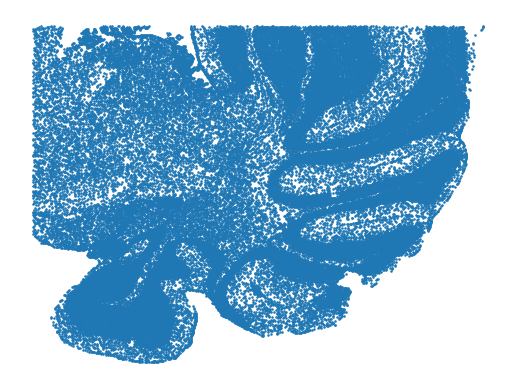

In [34]:
xs = ad_sp.obs.x
ys = ad_sp.obs.y
plt.axis('off')
plt.scatter(xs, ys, s=.7);
plt.gca().invert_yaxis()

In [35]:
np.unique(ad_sc.X.toarray()[0, :])
sc.pp.normalize_total(ad_sc)

In [36]:
ad_sc.obs.region.value_counts()
ad_sc

AnnData object with n_obs × n_vars = 7132 × 22335
    obs: 'nCount_RNA', 'nFeature_RNA', 'sex', 'region', 'cluster', 'datasets', 'age', 'Barcodes', 'percent.mito', 'percent.ribo', 'nCount_SCT', 'nFeature_SCT', 'tissue', 'dissociation', 'genotype', 'DCN', 'final.clusters1', 'final.clusters2', 'classes', 'unintegrated_clusters', 'cca_clusters', 'cca_clusters_2', 'broad_class', 'Vascular1', 'Choroid1', 'endothelial1', 'Astro1', 'Purkinje1', 'Neurons_Dcn_glu1', 'Oligo1', 'Granule_cells_mature1', 'Golgi1', 'PLI1', 'MLI1', 'Gaba_intermediate_prog1', 'pan_gaba1', 'pan_glu1', 'pan_neuron1', 'cell_type_final_high_res', 'seurat_clusters', 'ident'
    uns: 'X_name'
    obsm: 'PCA'
    layers: 'logcounts'

In [37]:
adata_sc = sc.read_h5ad('/home/giacomo/Documents/Analysis/Adult_mouse_transcriptome_analyses/dataset/Ludovic_annotation_10-23/cerebellum_integrated_10-23annot.h5ad')
sc.pp.log1p(adata_sc)
sc.tl.rank_genes_groups(adata_sc, groupby="cca_clusters", use_raw=False)
markers_df = pd.DataFrame(adata_sc.uns["rank_genes_groups"]["names"]).iloc[0:100, :]
markers = list(np.unique(markers_df.melt().value.values))
len(markers)

1621

In [38]:
ad_sc

AnnData object with n_obs × n_vars = 7132 × 22335
    obs: 'nCount_RNA', 'nFeature_RNA', 'sex', 'region', 'cluster', 'datasets', 'age', 'Barcodes', 'percent.mito', 'percent.ribo', 'nCount_SCT', 'nFeature_SCT', 'tissue', 'dissociation', 'genotype', 'DCN', 'final.clusters1', 'final.clusters2', 'classes', 'unintegrated_clusters', 'cca_clusters', 'cca_clusters_2', 'broad_class', 'Vascular1', 'Choroid1', 'endothelial1', 'Astro1', 'Purkinje1', 'Neurons_Dcn_glu1', 'Oligo1', 'Granule_cells_mature1', 'Golgi1', 'PLI1', 'MLI1', 'Gaba_intermediate_prog1', 'pan_gaba1', 'pan_glu1', 'pan_neuron1', 'cell_type_final_high_res', 'seurat_clusters', 'ident'
    uns: 'X_name'
    obsm: 'PCA'
    layers: 'logcounts'

In [39]:
tg.pp_adatas(ad_sc, ad_sp, genes=markers)

INFO:root:222 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:968 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [40]:
ad_sc

AnnData object with n_obs × n_vars = 7132 × 21218
    obs: 'nCount_RNA', 'nFeature_RNA', 'sex', 'region', 'cluster', 'datasets', 'age', 'Barcodes', 'percent.mito', 'percent.ribo', 'nCount_SCT', 'nFeature_SCT', 'tissue', 'dissociation', 'genotype', 'DCN', 'final.clusters1', 'final.clusters2', 'classes', 'unintegrated_clusters', 'cca_clusters', 'cca_clusters_2', 'broad_class', 'Vascular1', 'Choroid1', 'endothelial1', 'Astro1', 'Purkinje1', 'Neurons_Dcn_glu1', 'Oligo1', 'Granule_cells_mature1', 'Golgi1', 'PLI1', 'MLI1', 'Gaba_intermediate_prog1', 'pan_gaba1', 'pan_glu1', 'pan_neuron1', 'cell_type_final_high_res', 'seurat_clusters', 'ident'
    var: 'n_cells'
    uns: 'X_name', 'training_genes', 'overlap_genes'
    obsm: 'PCA'
    layers: 'logcounts'

In [41]:
ad_sp

AnnData object with n_obs × n_vars = 57936 × 1022
    obs: 'x', 'y', 'uniform_density', 'rna_count_based_density'
    var: 'n_cells'
    uns: 'training_genes', 'overlap_genes'

In [42]:
assert ad_sc.uns['training_genes'] == ad_sp.uns['training_genes']

In [43]:
ad_map = tg.map_cells_to_space(ad_sc, ad_sp,
#    mode="cells",
     mode="clusters",
     cluster_label='cca_clusters',  # .obs field w cell types
    density_prior='uniform',
    num_epochs=500,
    # device="cuda:0",
    device='cpu',
)

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 222 genes and uniform density_prior in clusters mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.228, KL reg: 0.158
Score: 0.357, KL reg: 0.011
Score: 0.359, KL reg: 0.011
Score: 0.359, KL reg: 0.011
Score: 0.359, KL reg: 0.011


INFO:root:Saving results..


INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


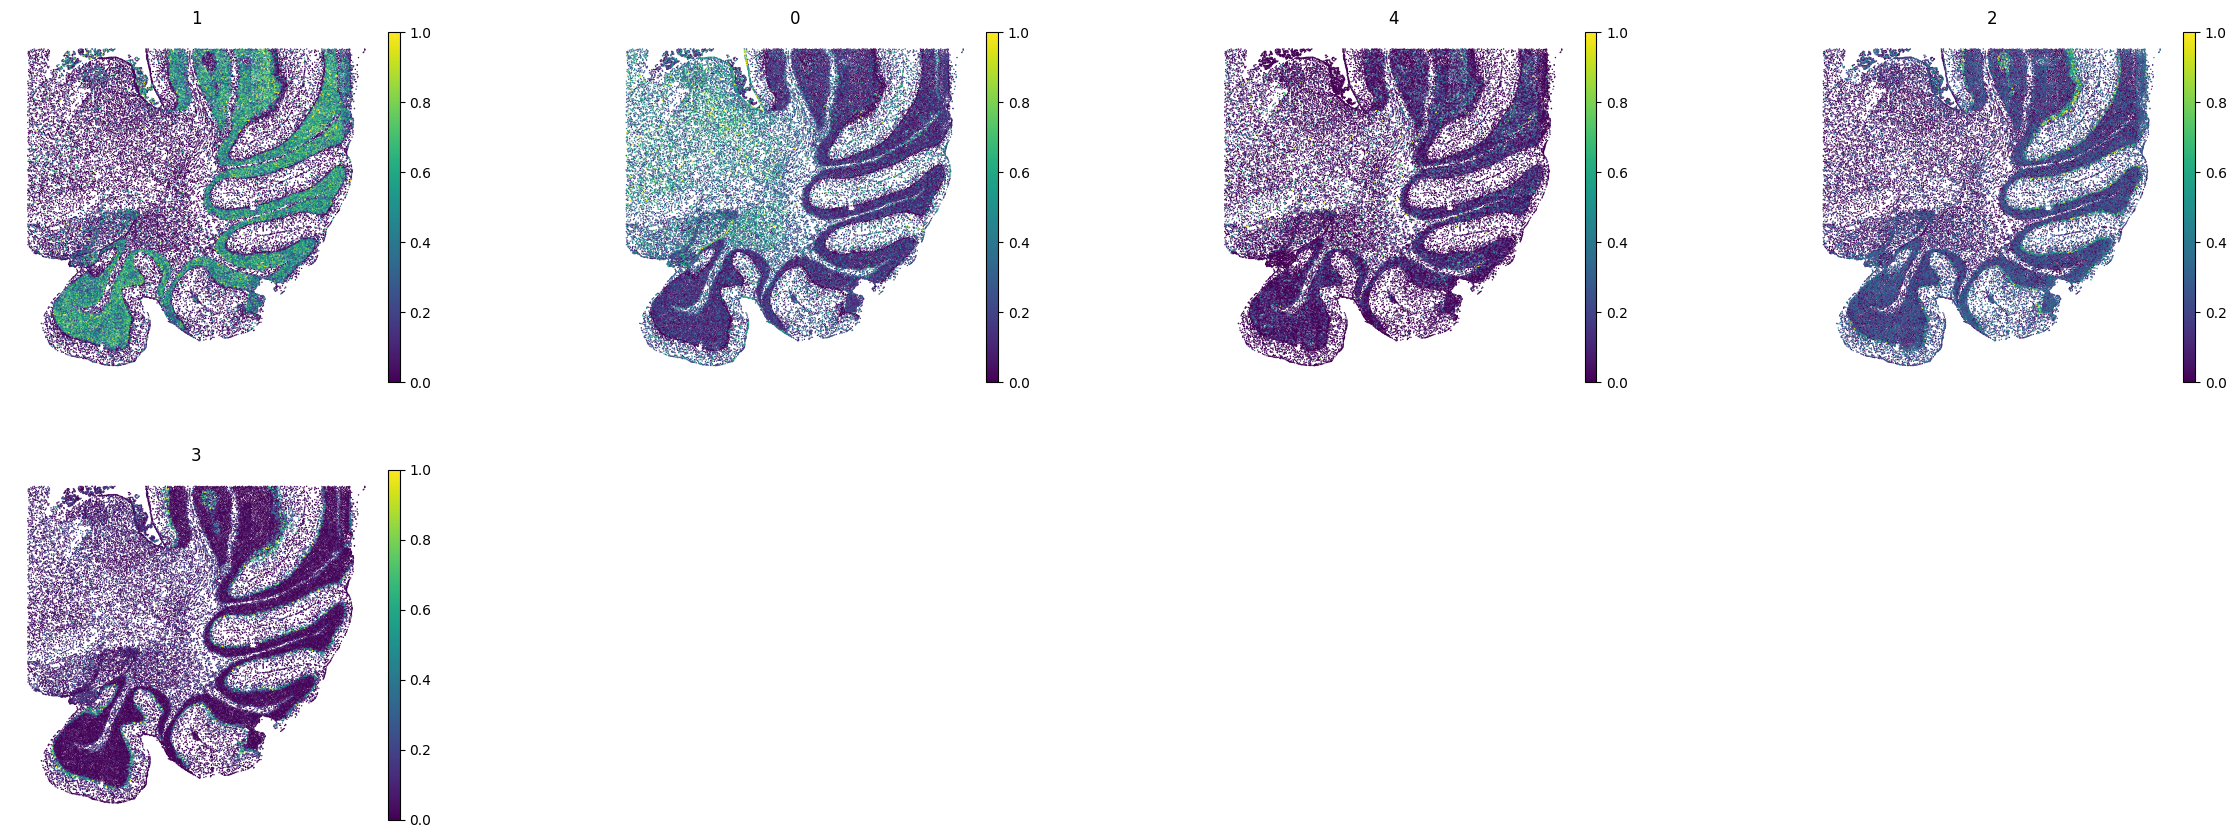

In [44]:
tg.project_cell_annotations(ad_map, ad_sp, annotation='cca_clusters')
annotation_list = list(pd.unique(ad_sc.obs['cca_clusters']))
tg.plot_cell_annotation_sc(ad_sp, annotation_list,x='x', y='y',spot_size= 100, scale_factor=0.1, perc=0.001, alpha_img = 0.5)

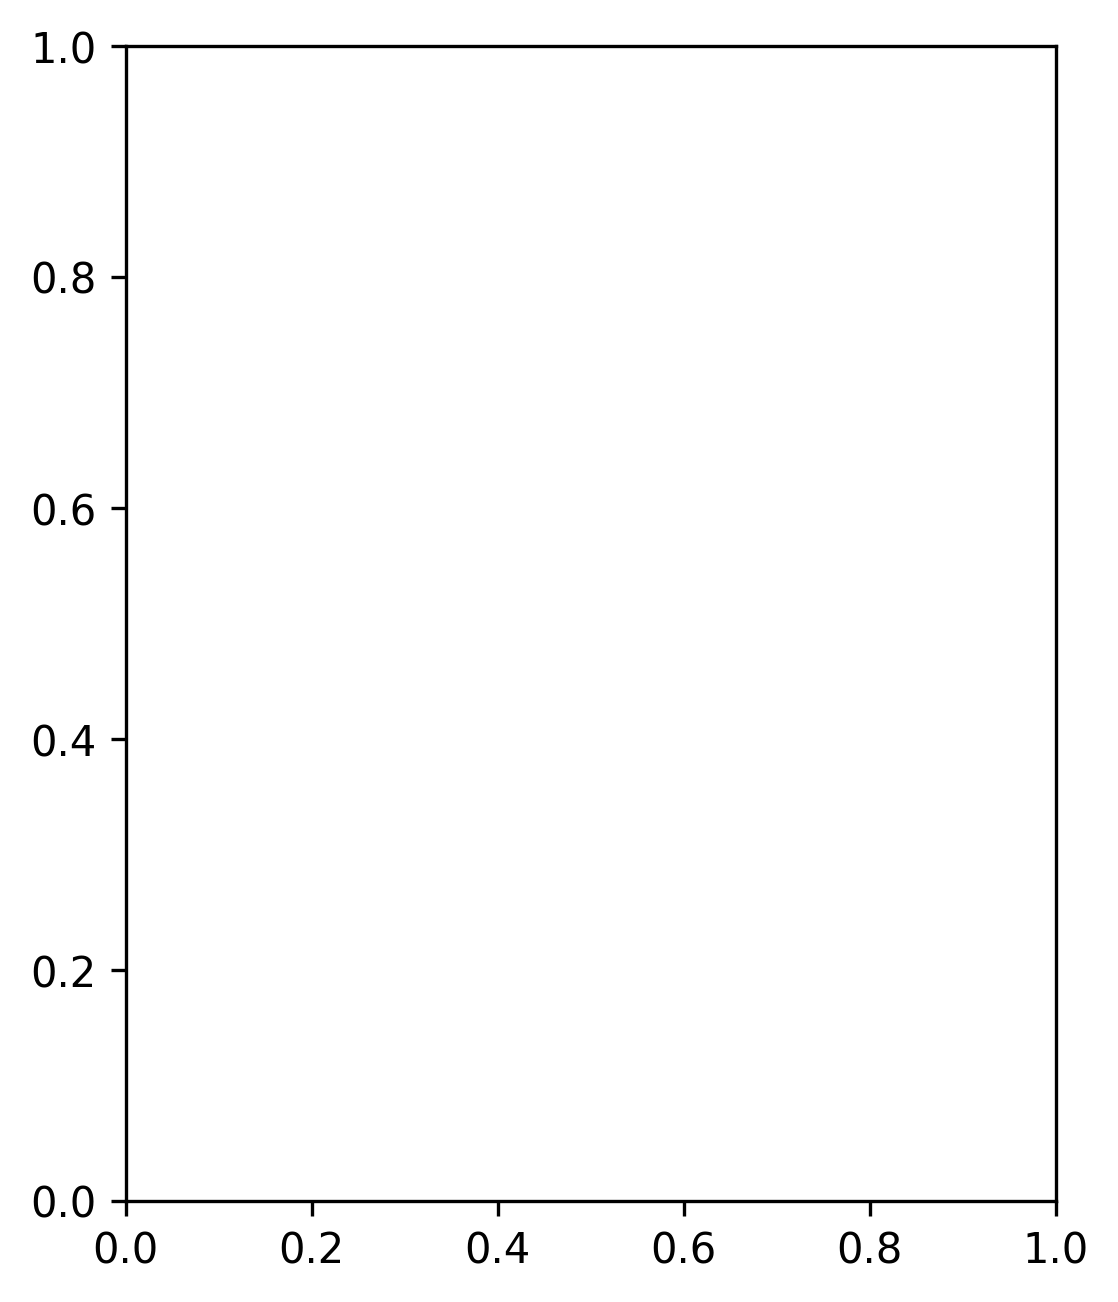

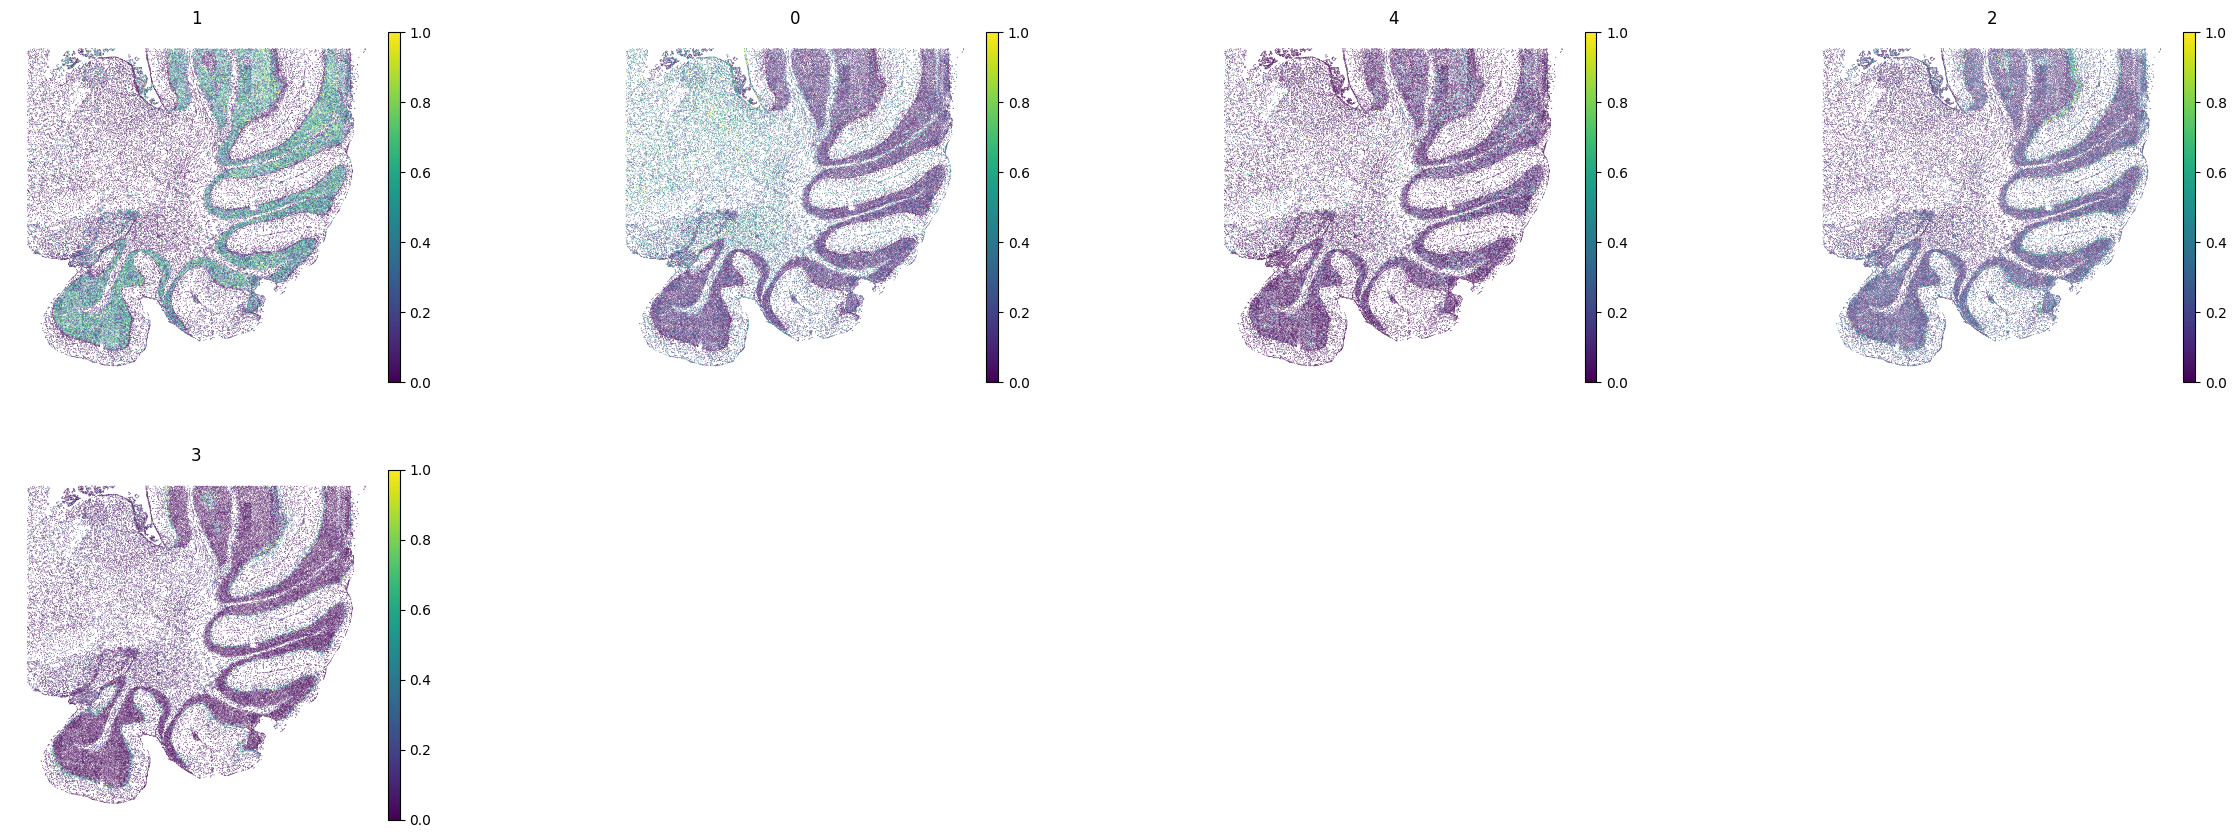

In [45]:
fig, ax = plt.subplots(figsize=(4, 5), dpi=300)
tg.plot_cell_annotation_sc(ad_sp, annotation_list,x='x', y='y',spot_size= 60, scale_factor=0.1, perc=0.001, alpha_img = 0.5)
plt.savefig('/home/giacomo/Documents/Analysis/Adult_mouse_transcriptome_analyses/dataset/Ludovic_annotation_10-23/plots/Subtypes_label_transfer_broad_well10.pdf')
    

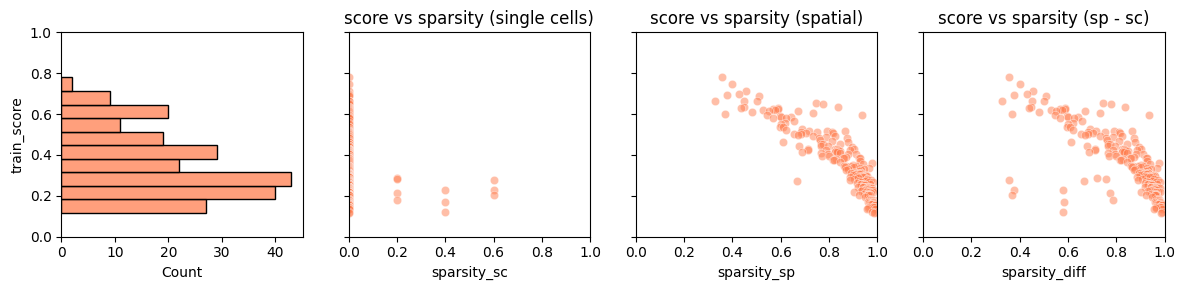

In [46]:
tg.plot_training_scores(ad_map, bins=10, alpha=.5)

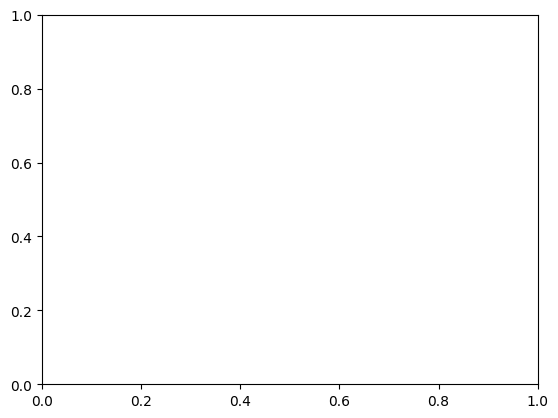

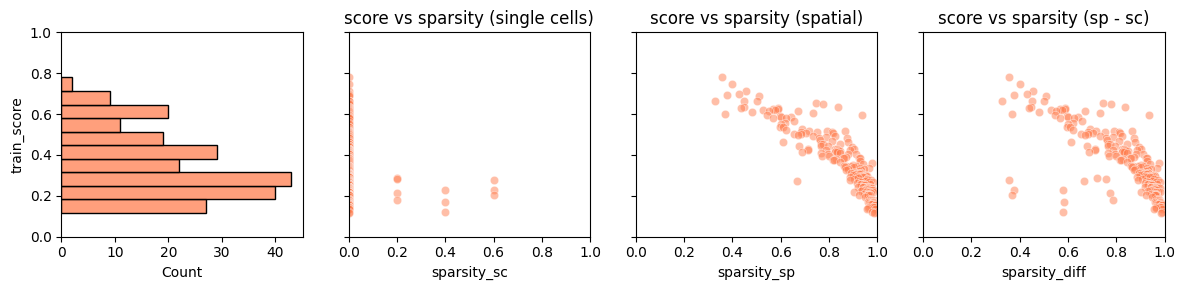

In [47]:
fig, ax = plt.subplots()
tg.plot_training_scores(ad_map, bins=10, alpha=.5)
plt.savefig('/home/giacomo/Documents/Analysis/Adult_mouse_transcriptome_analyses/dataset/Ludovic_annotation_10-23/plots/Subtypes_broad_well10__regionidentity_scores.pdf')

In [49]:
train_scores = ad_map.uns['train_genes_df']
train_scores.to_csv('/home/giacomo/Documents/Analysis/Adult_mouse_transcriptome_analyses/dataset/Ludovic_annotation_10-23/coronal10/Subtypes_broad_well10__regionidentity_scores.csv',index=True)

In [50]:
ad_sp

AnnData object with n_obs × n_vars = 57936 × 1022
    obs: 'x', 'y', 'uniform_density', 'rna_count_based_density'
    var: 'n_cells', 'sparsity'
    uns: 'training_genes', 'overlap_genes'
    obsm: 'tangram_ct_pred', 'spatial'

In [51]:
ad_sp.obsm['tangram_ct_pred'].to_csv("/home/giacomo/Documents/Analysis/Adult_mouse_transcriptome_analyses/dataset/Ludovic_annotation_10-23/coronal10/well10_Astro_clusters_predictions.csv")